# Analysing  which factors influence the price of a vehicle

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)    
* [Stage 2. Data preprocessing](#data_preprocessing)
* [Stage 3. Enriching data](#data_enriching)
* [Stage 4. Exploratory data analysis](#data_analysis)
* [General Conclusion](#conclusion)

# Introduction <a id='intro'></a>
In this project, we will analyze vehicles free advertisements data collected over the last few years and determine which factors influence the price of a vehicle.

### Stages 
We do not have information about the quality of the data, therefore, we would need to examine and preprocess the data before conducting the research. 

Firstly, we will evaluate the quality of the data and identify if there are any significant issues that need to be addressed. Secondly, we will preprocess the data: fill in/remove missing values. Then, we will enrich the data by adding additional columns that will help us to work with the data. Finally, we will carry out exploratory data analysis.
 
The project will consist of four stages:
 1. Data overview
 2. Data preprocessing
 3. Data enriching
 4. Exploratory data analysis

# Stage 1. Data overview <a id='data_review'></a>

First of all, we will load libraries that we will need to study the data.

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt

Next, we will load the data.

In [2]:
# Loading the data file into a DataFrame
data=pd.read_csv('/datasets/vehicles_us.csv')
#saving original data size for the future useage
data_len_original=len(data)

According to the documentation the dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

We will display general data info and a sample of the data.

In [3]:
# printing the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# printing a sample of data
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


As can be seen, there are 51525 rows and 13 columns in the table. Each row contains information about individual vehicle sale advertisement including price, built year, model, vehicle condition, number of cylinders, fuel used, mileage, transmission type, type of the vehicle, vehicle color, and the flag that indicates if the vehicle is 4 wheel drive. In addition, each row contains information about when the advertisement was posted and for how long it was listed.

Based on general info and sample of the data, `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd` columns have missing values. In addition, `model_year`, `cylinders`, `odometer`, `is_4wd` and `date_posted` columns have incorrect data types.

This issue should be addressed before we start answering the questions raised in that project.

# Stage 2. Data preprocessing <a id='data_preprocessing'></a>

Before starting exploratory data analysis, we will address the issues with the data. Firstly, we will check how many values are missing.

In [5]:
data.isnull().sum()*100/len(data)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

As can be seen, half of the values in the is_4wd column are missing. From the dataset description, this field is Boolean. Probably 'False' values were not filled in, so we will need to check it. Field cylinders, odometer, and paint_color have 10, 15, and 18 percent of missing values correspondingly. This is a lot, so we will need to decide what to do with missing values on these columns.

Next will go through each column one by one analyzing them and correcting incorrect and missing data. 

## Model_year column

Displaying sample of the data where values in `model_year` column are missing.

In [6]:
#getting sample of the data with missing values in model_year column
data[(data['model_year'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


From the sample of the data, it looks like the model years are missing at random as they are missing for different vehicle models and types. It could be that the model_year was not filled in for the new vehicle, but high values in the odometer column indicate that this is not true. Therefore, we cannot restore these values and will drop rows that contain them.

In [7]:
#dropping rows there values in model_year colunm are missing
data=data.dropna(subset=['model_year'])

## Cylinders column

Displaying sample of the data where values in `cylinders` column are missing.

In [8]:
#getting sample of the data with missing values in cylinders column
data[data['cylinders'].isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
75,6950,2005.0,chevrolet tahoe,excellent,NaN,gas,186021.0,automatic,SUV,NaN,1.0,2018-10-30,3
87,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52
119,14800,2016.0,kia sorento,like new,NaN,gas,NaN,automatic,SUV,brown,NaN,2019-02-27,93
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,NaN,1.0,2018-08-31,44
135,28000,2016.0,ford mustang gt coupe 2d,good,NaN,gas,NaN,other,coupe,black,NaN,2018-11-20,28


At the first glance, there is no correlation between missing values in that field and other fields. But it could be that each vehicle model has a fixed number of cylinders. If this hypothesis is true, we can reliably fill in missing data in the `cylinders` column. To test the hypothesis, we will calculate the mean for each model. If mean is a whole number, when most likely it has a fixed number of cylinders. If the mean is not a whole number when it clearly indicates that the model may have a different number of cylinders.

In [9]:
# calculating mean cylinders number for each model for rows where cylinder valus are not missing
data[data['cylinders'].notna()].pivot_table(index='model', values='cylinders')

,cylinders
model,
acura tl,5.970000
bmw x5,6.389610
buick enclave,6.000000
cadillac escalade,7.992537
chevrolet camaro,6.871795
...,...
toyota sienna,5.956364
toyota tacoma,5.344165
toyota tundra,7.922330


As can be seen, means for models are not whole numbers, which indicates that the same model can have a different number of cylinders. Since there is no correlation between models and the number of cylinders we cannot reliably restore missing values in the cylinders column and will drop them.

In [10]:
#dropping rows there values in cylinders colunm are missing
data=data.dropna(subset=['cylinders'])

## Odometer column

Displaying sample of the data where values in `odometer` column are missing.

In [11]:
#getting sample of the data with missing values in odometer column
data[data['odometer'].isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
29,5495,2010.0,chevrolet impala,excellent,6.0,gas,NaN,automatic,sedan,white,NaN,2019-02-18,20
38,7999,2015.0,chrysler 200,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2019-03-08,29
41,11995,2017.0,nissan rogue,like new,4.0,gas,NaN,automatic,SUV,silver,1.0,2018-09-20,21
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
56,4200,2006.0,jeep grand cherokee,excellent,6.0,gas,NaN,automatic,SUV,white,1.0,2018-07-01,79


It could be that `odometer` values were not filled for new vehicles, but as can be seen from the above data sample, vehicles with missing values in that column have different model years. Therefore, since there is no correlation between `model_year` and `odometer` we cannot reliably restore missing values in the odometer column and will drop them.

In [12]:
#dropping rows there values in odometer colunm are missing
data=data.dropna(subset=['odometer'])

## Paint_color column

As was seen from the data general info, the number of missing values in that column is too high. Taking into consideration the fact that data in this column should not affect other factors that influence the price of a vehicle, we will replace missing values in that column with 'unknown' values.

In [13]:
data['paint_color']=data['paint_color'].fillna('unknown')

## Is_4wd column

It looks like this column has Boolean values there 1 represents True and missing values represent False. To confirm this hypothesis, we will check unique values from that column.

In [14]:
#printing all unique values in is_4wd column
data['is_4wd'].unique()

array([ 1., nan])

There are only 1. and nan values so our hypothesis looks to be correct. Therefore, we will replace missing values with 0.

In [15]:
#replacing missing values in is_4wd column with 0
data['is_4wd']=data['is_4wd'].where(data['is_4wd'] == 1, 0)

In [16]:
data['is_4wd'].value_counts()

0.0    18303
1.0    18116
Name: is_4wd, dtype: int64

We have addressed the missing values. Now we will confirm that now there are no missing values except values in the `paint_color` column.

In [17]:
#printing general data general info after missing values were addressed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36419 entries, 0 to 51523
Data columns (total 13 columns):
price           36419 non-null int64
model_year      36419 non-null float64
model           36419 non-null object
condition       36419 non-null object
cylinders       36419 non-null float64
fuel            36419 non-null object
odometer        36419 non-null float64
transmission    36419 non-null object
type            36419 non-null object
paint_color     36419 non-null object
is_4wd          36419 non-null float64
date_posted     36419 non-null object
days_listed     36419 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 3.9+ MB


We also will check how the size of the data has changed after the missing values were removed.

In [18]:
#calculating the percent of the data left
len(data)/data_len_original

0.7068219311014071

As can be seen, we deleted 30% of the rows. This is a lot, but the size of the data is still high and sufficient to continue our study. Moreover, this is an acceptable trade-off, as this is better to have a smaller but more reliable dataset.

## Fixing data types

As we found at the beginning of the study, `model_year`, `cylinders`, `odometer`, `is_4wd` and `date_posted` columns have incorrect data types. Now we will correct them.

In [19]:
#changing type of model_year column to int
data['model_year']=data['model_year'].astype('int')

#changing type of cylinders column to int
data['cylinders']=data['cylinders'].astype('int')

#changing type of odometer column to int
data['odometer']=data['odometer'].astype('int')

#changing type of is_4wd column to int
data['is_4wd']=data['is_4wd'].astype('bool')

#changing type of date_posted column to datetime
data['date_posted']=pd.to_datetime(data['date_posted'], format='%Y-%m-%d') 

Ensuring that the columns type were corrected.

In [20]:
#printing data general info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36419 entries, 0 to 51523
Data columns (total 13 columns):
price           36419 non-null int64
model_year      36419 non-null int64
model           36419 non-null object
condition       36419 non-null object
cylinders       36419 non-null int64
fuel            36419 non-null object
odometer        36419 non-null int64
transmission    36419 non-null object
type            36419 non-null object
paint_color     36419 non-null object
is_4wd          36419 non-null bool
date_posted     36419 non-null datetime64[ns]
days_listed     36419 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 3.6+ MB


In [21]:
#printing sample of data
data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005,ford taurus,excellent,6,gas,110200,automatic,sedan,silver,False,2018-08-10,63
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,False,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,False,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32


So far, we have addressed missing values in model_year, cylinders, odometer, paint_color and is_4wd columns. Also, we have corrected the data type for model_year, cylinders, odometer, is_4wd and date_posted columns.

Next, we will enrich data adding additional columns that will help us to work with the data.

# Stage 3. Enriching data <a id='data_enriching'></a>

To make the analysis easier we will add columns that will contain information about the vehicle's age when the ad was placed and the vehicle's average mileage per year. In addition, we will replace the categorical values in the `condition` column with a numeric scale.

To add the vehicle's age when the ad was placed, we will subtract `model_year` from the year when the ad was posted.

In [22]:
# Adding the vehicle's age when the ad was placed
data['vehicle_age']=data['date_posted'].dt.year-data['model_year']

To get the average mileage per year we will divide `odometer` by `vehicle_age`. If the vehicle model year and year of the date posted are the same, then vehicle_age is 0 and we will get division by 0 error. Therefore, for vehicles aged 0, we will use mileage as mileage per year value. For all other vehicles, we will use mileage divided by `vehicle_age` value.

In [23]:
# Adding the vehicle's average mileage per year
data['average_mileage']=data['odometer'].where(data['vehicle_age']==0,data['odometer']/data['vehicle_age'])

#changing type of average_mileage column to int
data['average_mileage']=data['average_mileage'].astype('int')

Before replacing the categorical values in the `condition` column with a numeric scale, we will store condition - condition_code pairs in a dictionary for future references.

In [24]:
#puting condition - condition_code pairs in a dictionary
condition_dict=pd.DataFrame(
    {
        'condition': ['new', 'like new', 'excellent', 'good', 'fair', 'salvage'],
        'condition_code': [5, 4, 3, 2, 1, 0]        
    }
)

#adding condition_code column to the data
data=data.merge(condition_dict, on='condition')

#removing condition column from the data
data=data.drop(columns=['condition'])


Ensuring that the columns with the correct values were added.

In [25]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36419 entries, 0 to 36418
Data columns (total 15 columns):
price              36419 non-null int64
model_year         36419 non-null int64
model              36419 non-null object
cylinders          36419 non-null int64
fuel               36419 non-null object
odometer           36419 non-null int64
transmission       36419 non-null object
type               36419 non-null object
paint_color        36419 non-null object
is_4wd             36419 non-null bool
date_posted        36419 non-null datetime64[ns]
days_listed        36419 non-null int64
vehicle_age        36419 non-null int64
average_mileage    36419 non-null int64
condition_code     36419 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(8), object(5)
memory usage: 4.2+ MB


In [26]:
# print a sample of data
data.head(10)

,price,model_year,model,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,average_mileage,condition_code
0,9400,2011,bmw x5,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,7,20714,2
1,5250,2007,toyota rav4,6,gas,154000,automatic,SUV,unknown,False,2018-08-22,8,11,14000,2
2,5000,2009,jeep liberty,6,gas,137273,automatic,SUV,white,True,2019-02-19,14,10,13727,2
3,9500,2008,toyota highlander,6,gas,149799,automatic,SUV,unknown,False,2018-06-04,121,10,14979,2
4,14999,2015,dodge charger,6,gas,63037,automatic,sedan,unknown,False,2018-05-11,37,3,21012,2
5,8000,2009,ford f-150,8,gas,234000,automatic,truck,black,True,2019-03-31,1,10,23400,2
6,4500,2004,jeep grand cherokee,6,gas,168821,automatic,SUV,unknown,True,2019-01-31,60,15,11254,2
7,2400,2001,toyota camry,4,gas,277564,automatic,coupe,yellow,False,2018-05-27,51,17,16327,2
8,12500,2008,toyota 4runner,6,gas,141098,automatic,SUV,grey,False,2019-03-10,35,11,12827,2
9,3800,2012,ford focus,4,gas,130323,automatic,sedan,black,False,2018-11-29,261,6,21720,2


To make the analysis easier we added columns that contain information about the vehicle's age when the ad was placed and the vehicle's average mileage per year. In addition, we replaced the categorical values in the condition column with a numeric scale.

At the next stage, we will carry out exploratory data analysis.

# Stage 4.  Exploratory data analysis <a id='data_analysis'></a>

## Studying core parameters

Firstly, we will study core parameters (Price,  vehicle's age when the ad was placed, Mileage, Number of cylinders and Condition) of the data to find out how outliers affect the form and readability of the histograms and reliability of the data.

We are going to plot a histogram for each core parameter.

### Price

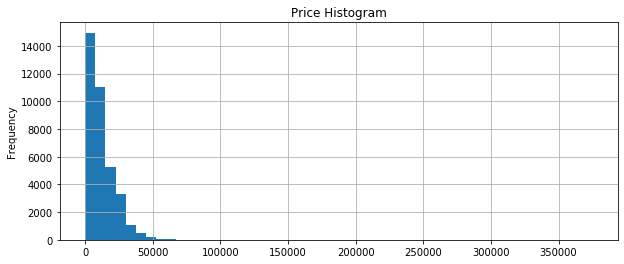

In [27]:
# ploting histogram for price
data['price'].plot(kind='hist', bins=50, figsize=(10,4),title='Price Histogram', grid=True)
plt.show()

The majority of prices are below 50000, but some outliers are close to 400000. Let's limit the histogram range to have a closer look at the interval to which the majority of the prices belong.

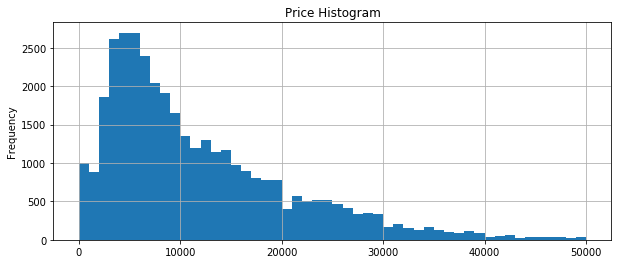

In [28]:
#ploting histogram for price in range (0,50000)
data['price'].plot(kind='hist', bins=50, figsize=(10,4),title='Price Histogram', grid=True, range=(0,50000))
plt.show()

Looks like some prices are 0, which cannot be true. Let's limit the histogram range further to have a closer look at the interval close to 0.

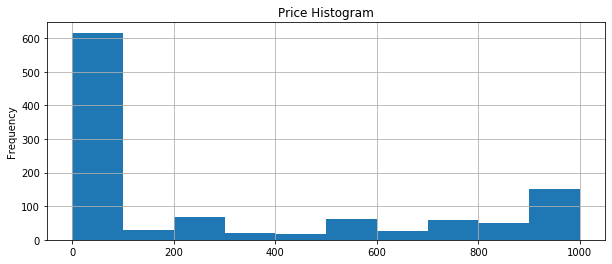

In [29]:
#ploting histogram for price in range (0,1000)
data['price'].plot(kind='hist', bins=10, figsize=(10,4),title='Price Histogram', grid=True, range=(0,1000))
plt.show()

As can be seen, the majority of prices are below 50000. Also, the largest portion of vehicles have prices in 0-10000 intervals, and outliers may have prices as high as 4000. In addition, it is confirmed that almost 600 ads have rice of 0. We would need to remove them as the price cannot be 0.

### Vehicle_age

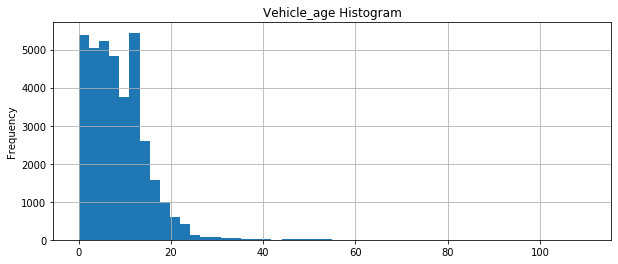

In [30]:
# ploting histogram for vehicle_age
data['vehicle_age'].plot(kind='hist', bins=50, figsize=(10,4),title='Vehicle_age Histogram', grid=True)
plt.show()

The majority of ages are below 30, but some outliers are close to 120.

### Mileage

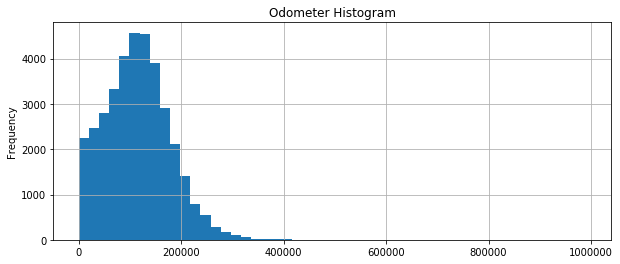

In [31]:
# ploting histogram for mileage
data['odometer'].plot(kind='hist', bins=50, figsize=(10,4),title='Odometer Histogram', grid=True)
plt.show()

The majority of odometer values are below 400000, but some outliers are close to a million.

### Number of cylinders

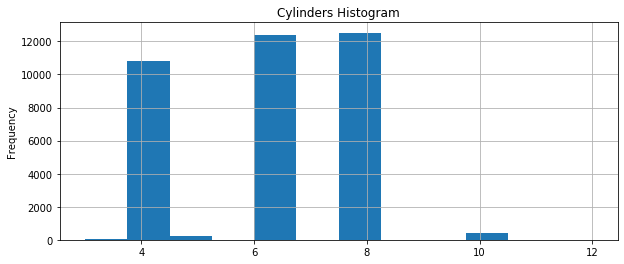

In [32]:
# ploting histogram for number of cylinders
data['cylinders'].plot(kind='hist', bins=12, figsize=(10,4),title='Cylinders Histogram', grid=True)
plt.show()

As can be seen, the majority of vehicles have 4, 6 or 8 cylinders.

### Condition

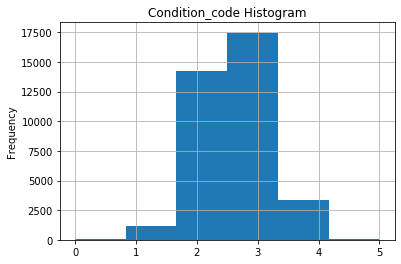

In [33]:
# ploting histogram for condition_code
data['condition_code'].plot(kind='hist', bins=6, figsize=(6,4),title='Condition_code Histogram', grid=True)
plt.show()

As can be seen, the majority of vehicles have excellent or good condition. Around 3000 vehicles have the like-new condition. And few vehicles are in new or salvage condition.

## Studying and treating outliers

Next, we will define limits for outliers and create a new data frame without them. As we saw the majority of prices are below 50000, but some outliers are close to 400000. The majority of ages are below 30, but some outliers are close to 120. And the majority of odometer values are below 400000, but some outliers are close to a million. For these columns, we will define outlies as all values that are higher than 3rd quantile plus 1.5 interquartile ranges or lower than 1st quantile minus 1.5 interquartile ranges.

To simplify upper and lower limits calculation we will define a function.

In [34]:
#defining a function to calculate upper and lower limits
def limits(column):
#calculating 1st and 3rd quantile
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
#calculating interquartile ranges.
    iqr=q3-q1
#calculating and returning upper and lower limits
    upper_lim=q3+iqr*1.5
    lower_lim=q1-iqr*1.5
    return upper_lim, lower_lim

Using the function to calculate limits for the price, vehicle age, and mileage.

In [35]:
# culculating the limits for outliers
price_high,price_low=limits(data['price'])
age_high,age_low=limits(data['vehicle_age'])
mileage_high,mileage_low=limits(data['odometer'])

#printing the limits
print(f'Price limits {price_high},{price_low}')
print(f'Vehicle age limits {age_high},{age_low}')
print(f'Mileage limits {mileage_high},{mileage_low}')

Price limits 34750.0,-12850.0
Vehicle age limits 24.0,-8.0
Mileage limits 282719.0,-57865.0


Vehicle age and mileage cannot be negative, therefore, we will not use lower limits for them. Price also cannot be negative and it cannot be 0 either. Price below 500$ also does not look realistic, therefore, we will use 500 as the lower limit for the price. 

Using the defined limits, we will filter the data and store it in a new data frame.

In [36]:
# Storing data without outliers in a separate DataFrame
data_clean=data[(data['price']<price_high)&(data['price']>500)
                &(data['vehicle_age']<age_high)&(data['odometer']<mileage_high)]



As we saw, few ads have particular cylinder numbers. We will count cylinder values to decide if we should keep ads with those values.

In [37]:
#counting values for cylinders
data_clean['cylinders'].value_counts()

6     11626
8     10878
4     10483
5       214
10      199
3        29
12        1
Name: cylinders, dtype: int64

There are only 29 vehicles with 3 cylinders and just one with 12 cylinders. This is not sufficient to produce a valid result, so we will drop ads that have this number of cylinders.

In [38]:
#excluding rows where number of cylinders 3 or 12
data_clean=data_clean[~data_clean['cylinders'].isin([3,12])]

Similar to cylinders, only a few ads have a particular condition_code. We will count condition_code values to decide if we should keep ads with those values.

In [39]:
#counting values for condition_code
data_clean['condition_code'].value_counts()

3    15889
2    13508
4     2940
1      939
0       65
5       59
Name: condition_code, dtype: int64

There are no value counts less than 50, therefore we will keep them all.

Let us print a sample of the filtered data.

In [40]:
#printing a sample of clean data
data_clean.head(10)

,price,model_year,model,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,average_mileage,condition_code
0,9400,2011,bmw x5,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,7,20714,2
1,5250,2007,toyota rav4,6,gas,154000,automatic,SUV,unknown,False,2018-08-22,8,11,14000,2
2,5000,2009,jeep liberty,6,gas,137273,automatic,SUV,white,True,2019-02-19,14,10,13727,2
3,9500,2008,toyota highlander,6,gas,149799,automatic,SUV,unknown,False,2018-06-04,121,10,14979,2
4,14999,2015,dodge charger,6,gas,63037,automatic,sedan,unknown,False,2018-05-11,37,3,21012,2
5,8000,2009,ford f-150,8,gas,234000,automatic,truck,black,True,2019-03-31,1,10,23400,2
6,4500,2004,jeep grand cherokee,6,gas,168821,automatic,SUV,unknown,True,2019-01-31,60,15,11254,2
7,2400,2001,toyota camry,4,gas,277564,automatic,coupe,yellow,False,2018-05-27,51,17,16327,2
8,12500,2008,toyota 4runner,6,gas,141098,automatic,SUV,grey,False,2019-03-10,35,11,12827,2
9,3800,2012,ford focus,4,gas,130323,automatic,sedan,black,False,2018-11-29,261,6,21720,2


We filtered the data based on defined limits for outliers for the price, vehicle age, and mileage parameters, and value count for cylinders and conditions parameters. The sample of the clean data looks good, so next, we will re-plot histograms for the core parameters.

## Studying core parameters without outliers

Now when the data is cleaned of outliers we will plot and study core parameters once again. We will not re-plot histograms for cylinders and condition_type as there are not too many values and they have not changed significantly.

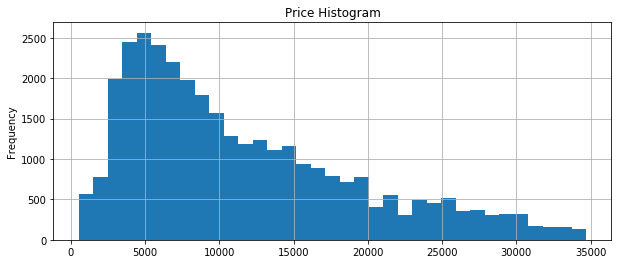

In [41]:
# ploting histogram for price
data_clean['price'].plot(kind='hist', bins=35, figsize=(10,4),title='Price Histogram', grid=True)
plt.show()

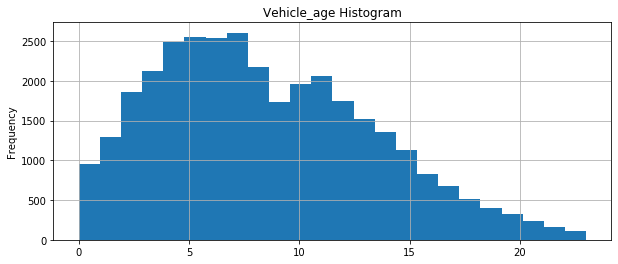

In [42]:
# ploting histogram for vehicle_age
data_clean['vehicle_age'].plot(kind='hist', bins=24, figsize=(10,4),title='Vehicle_age Histogram', grid=True)
plt.show()

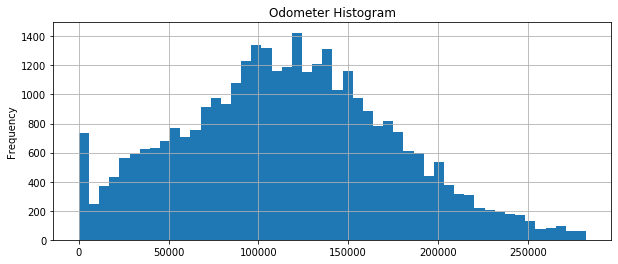

In [43]:
# ploting histogram for mileage
data_clean['odometer'].plot(kind='hist', bins=50, figsize=(10,4),title='Odometer Histogram', grid=True)
plt.show()

Now the distribution of values looks more reliable and we can start answering questions raised at the beginning of the study.

## Ads lifetime

We will study how many days advertisements were displayed on average for that we will calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

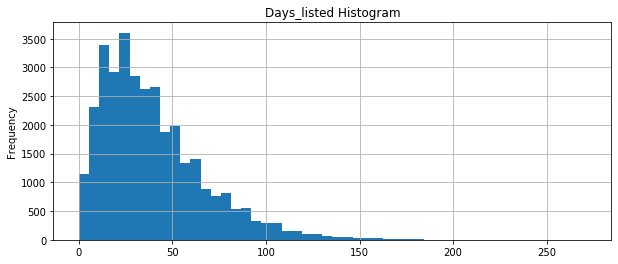

In [44]:
# ploting histogram for days_listed
data_clean['days_listed'].plot(kind='hist', bins=50, figsize=(10,4),title='Days_listed Histogram', grid=True)
plt.show()

In [45]:
#calculating mean
data_clean['days_listed'].mean()

39.671437125748504

In [46]:
#calculating median
data_clean['days_listed'].median()

33.0

To determine the typical ad lifecycle we will use boxplot and days_listed description.

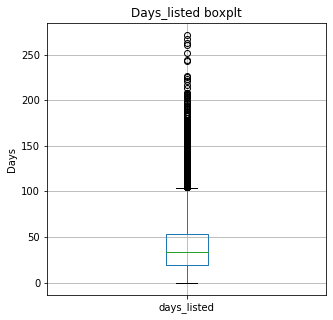

count    33400.000000
mean        39.671437
std         28.147135
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [47]:
#creating boxplot for days_listed
data_clean.boxplot(column='days_listed', figsize=(5,5))
plt.title('Days_listed boxplt')
plt.ylabel('Days')
plt.show()

#printing days_listed description
data_clean['days_listed'].describe()

As can see, typically an ad is listed between 19 and 33 days. Listed times longer than 100 can be considered as extremely long. Listed times lower than 19 can be described as low.

## Average price per each type of vehicle

Next, we will analyze the number of ads and the average price for each type of vehicle. Then, we will plot a graph showing the dependence of the number of ads on the vehicle type to determine the two types with the greatest number of ads.

In [48]:
#creating pivot table showing number of ads and the average price for each type of vehicle
type_data=data_clean.pivot_table(index='type',values='price', aggfunc=['count','mean']).reset_index()

#renaming columns in the pivot table
type_data.columns=['type','count','mean']

#sorting values by count 
type_data=type_data.sort_values('count')

#printing the pivot table
type_data

,type,count,mean
1,bus,18,16293.666667
6,offroad,137,14563.956204
7,other,160,10652.468750
2,convertible,242,13497.665289
11,van,401,9345.583541
4,hatchback,686,6875.482507
5,mini-van,815,8196.288344
12,wagon,1047,8997.498567
3,coupe,1392,13995.973420
8,pickup,4428,15252.100271


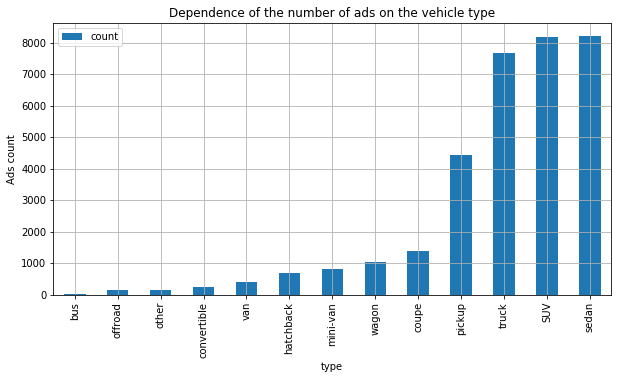

In [49]:
type_data.plot(x='type', y='count', kind='bar', figsize=(10,5), grid=True, title='Dependence of the number of ads on the vehicle type')
plt.ylabel('Ads count')
plt.show()

Buses have the highest average price followed by trucks. SUVs and sedans are the most sellable types of vehicles.

## Price factors

Finally, we will determine what factors impact the price most. For two most the most sellable types of vehicles we will study whether the price depends on age, mileage, condition, transmission type, and color.

### Sedans

Getting data for sedans.

In [50]:
#filtering data by sedan type
sedan_data=data_clean.query('type=="sedan"')[['price', 'vehicle_age', 'odometer', 'condition_code', 'transmission', 'paint_color']]

Studying sedans data.

In [51]:
#printing sample of sedan data
sedan_data.head(10)

,price,vehicle_age,odometer,condition_code,transmission,paint_color
4,14999,3,63037,2,automatic,unknown
9,3800,6,130323,2,automatic,black
15,10499,2,53601,2,automatic,black
16,15999,1,17498,2,automatic,black
23,9950,4,102878,2,automatic,white
44,4600,6,146000,2,automatic,unknown
48,2900,18,170000,2,automatic,green
51,4900,7,116000,2,automatic,silver
62,3995,19,180000,2,automatic,black
65,3595,13,147667,2,automatic,red


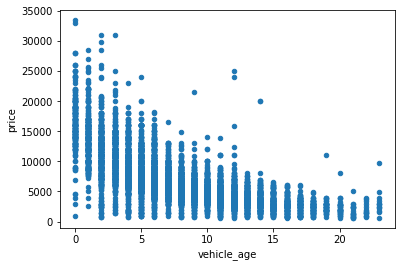

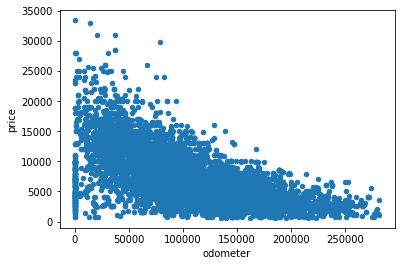

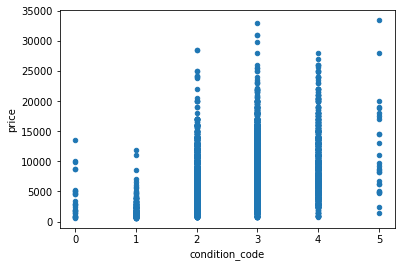

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


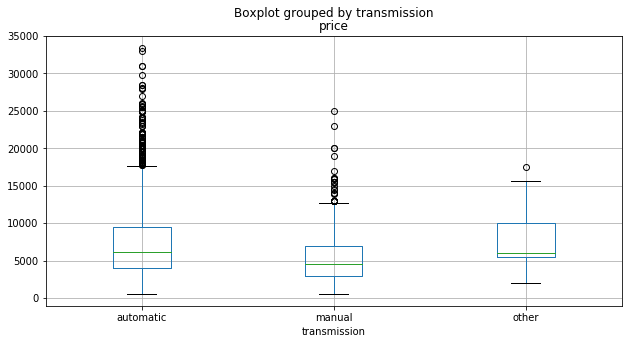

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


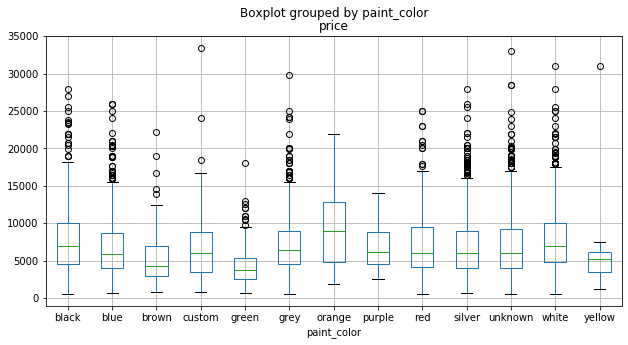

In [52]:
#plotting boxplots for transmission and paint_color columns 
#and scatter plots for vehicle_age, odometer and condition_code columns
for column in sedan_data.columns:
    if column in ['transmission','paint_color']:
        sedan_data.boxplot(column='price', by=column, figsize=(10, 5), grid=True)
        plt.show()
    elif column in ['vehicle_age','odometer','condition_code']:
        sedan_data.plot(x=column, y='price', kind='scatter')
        plt.show()

In [53]:
#printing correlation matrix for sedan data
sedan_data.corr()

,price,vehicle_age,odometer,condition_code
price,1.000000,-0.711460,-0.625275,0.326142
vehicle_age,-0.711460,1.000000,0.595594,-0.304720
odometer,-0.625275,0.595594,1.000000,-0.324683
condition_code,0.326142,-0.304720,-0.324683,1.000000


As can be seen, there is a negative correlation between vehicle_age and price and between mileage and price. Newer vehicles with lower mileage cost more. Although both these factors highly influence the price, vehicle_age looks to impact the price higher as it has the highest absolute correlation. In addition, orange vehicles have a bit higher average price. Also, the price of the vehicle with automatic transmission outweighs the price of the vehicle with the manual one.

### SUV

Getting data for SUV.

In [54]:
suv_data=data_clean.query('type=="SUV"')[['price', 'vehicle_age', 'odometer', 'condition_code', 'transmission', 'paint_color']]

Studying suv data.

In [55]:
#printing sample of suv data
suv_data.head(10)

,price,vehicle_age,odometer,condition_code,transmission,paint_color
0,9400,7,145000,2,automatic,unknown
1,5250,11,154000,2,automatic,unknown
2,5000,10,137273,2,automatic,white
3,9500,10,149799,2,automatic,unknown
6,4500,15,168821,2,automatic,unknown
8,12500,11,141098,2,automatic,grey
10,3300,8,188963,2,manual,black
33,5500,14,140355,2,automatic,white
47,10999,8,98193,2,automatic,blue
49,2700,14,150352,2,automatic,silver


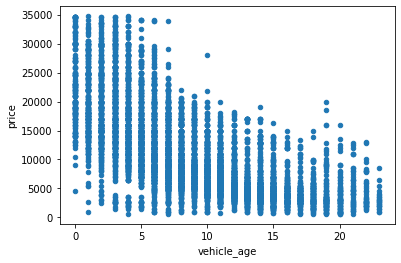

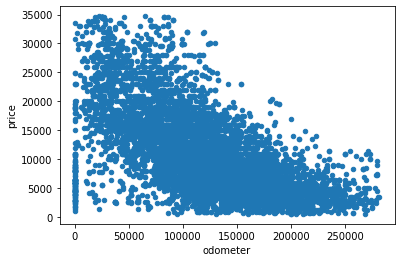

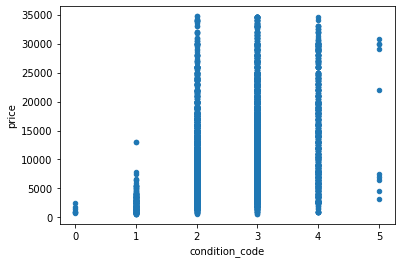

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


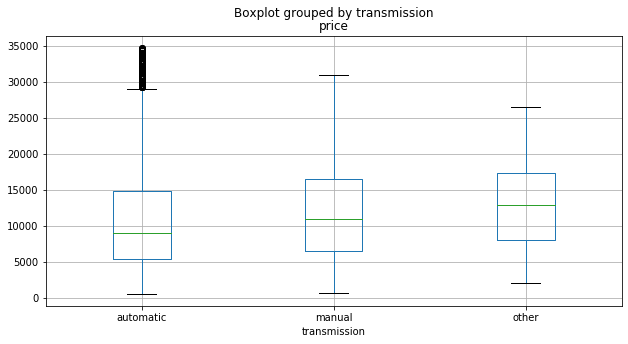

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


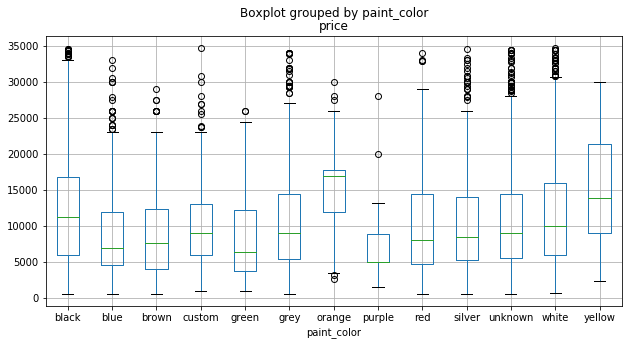

In [56]:
#plotting boxplots for transmission and paint_color columns 
#and scatter plots for vehicle_age, odometer and condition_code columns
for column in suv_data.columns:
    if column in ['transmission','paint_color']:
        suv_data.boxplot(column='price', by=column, figsize=(10, 5))
        plt.show()
    elif column in ['vehicle_age','odometer','condition_code']:
        suv_data.plot(x=column, y='price', kind='scatter')
        plt.show()

In [57]:
#printing correlation matrix for sedan data
suv_data.corr()

,price,vehicle_age,odometer,condition_code
price,1.000000,-0.681614,-0.611743,0.299345
vehicle_age,-0.681614,1.000000,0.606832,-0.309620
odometer,-0.611743,0.606832,1.000000,-0.314458
condition_code,0.299345,-0.309620,-0.314458,1.000000


The same as for sedans, vehicle_age and price factors highly influence the price of SUVs, but vehicle_age looks to impact the price higher as it has the highest absolute correlation. In addition, yellow vehicles have a bit higher average price. But unlike sedans, SUVs with manual transmission cost higher on average.

# General conclusion <a id='conclusion'></a>

We have analyzed vehicles free advertisements data collected over the last few years and studied which factors influence the price of a vehicle.

A large number of values was missing, so we had to address them. Based on the conducted research we deleted rows that had missing values in model_year, cylinders, and odometer columns. Paint_color column had too many missing values, therefore it was unsuitable to delete them and we replaced them with 'unknown' value. Missing values in the is_4wd column appeared to represent False values, so we replaced them with 0. Also, we have corrected the data type for model_year, cylinders, odometer, is_4wd and date_posted columns.

To make the analysis easier we added columns that contain information about the vehicle's age when the ad was placed and the vehicle's average mileage per year. In addition, we replaced the categorical values in the condition column with a numeric scale.

Then, we plotted histograms for core parameters (Price, vehicle's age when the ad was placed, Mileage, Number of cylinders, and Condition) of the data and observed that there were outliers that affected the form and readability of the histograms and reliability of the data. We filtered the data based on defined limits for outliers for the price, vehicle age, and mileage parameters, and value count for cylinders and conditions parameters.

We analysed the cleaned dataset and found that:

1. Typically an ad is listed between 19 and 33 days. 
2. Buses have the highest average price followed by trucks. 
3. SUVs and sedans are the most sellable types of vehicles.
4. Vehicle age has the highest impact on the prices followed by mileage. In other words, newer vehicles with lower mileage cost more.
5. While sedans with automatic transmissions cost more than manual ones, the trend is different for SUVs. SUVs with manual transmission cost higher on average.